## Logistic Regression/classification

We will be working on adult dataset of US census. Dataset can be obtained from 

https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
The aim of this analysis is to find whether the salary is >$50K or <$50K

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dataset doesn't have a header. So, obtained the header from the description

In [8]:
colmn=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','salary']

In [9]:
adult=pd.read_csv('C:\\Users\\sagar\\Documents\\GitHub\\ML\\Classification_adult\\adult_train.txt',names=colmn,index_col=False)
adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


removing the nulls. Waste of analysis

In [10]:
adult.replace(to_replace=' ?',value=np.NaN,inplace=True)
adult.dropna(subset=['workclass'],inplace=True)
adult.dropna(subset=['occupation'],inplace=True)
adult.dropna(subset=['native_country'],inplace=True)

In [11]:
adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
salary            object
dtype: object

let's check the frequency of the column, i mean histogram/pie chart before going into further details

to ensure removing white space before the character data, we get the character columns and strip them off with any trailing or leading spaces

In [12]:
mylist = list(adult.select_dtypes(include=['object']).columns)
mylist

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'salary']

In [13]:
for i in mylist:
    adult[i]=adult[i].str.strip() #stripped the blank space. This helps in giving correct where conditions

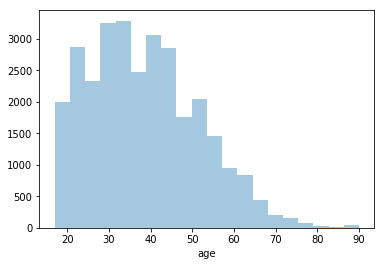

In [14]:
sns.distplot(adult['age'], bins=20, kde=False,rug=False)
plt.show()

In [15]:
adult['workclass_ind' ] =pd.Categorical(adult.workclass).codes
adult['education_ind' ] =pd.Categorical(adult.education).codes
adult['marital_status_ind' ] =pd.Categorical(adult.marital_status).codes
adult['occupation_ind' ] =pd.Categorical(adult.occupation).codes
adult['relationship_ind' ] =pd.Categorical(adult.relationship).codes
adult['race_ind' ] =pd.Categorical(adult.race).codes
adult['native_country_ind' ] =pd.Categorical(adult.native_country).codes
adult['salary_ind' ] =pd.Categorical(adult.salary).codes

inference: There are very less records from age 70 onwards. Can consider them as different set

In [51]:
def catcreate(var,dataset):
        j=0
        dataset[var +'_ind']=0
        k=var+'_dict'
        k={}
        uniq=list(dataset[var].unique())
        for i in uniq:
            dataset.loc[dataset[var] == i, var +'_ind'] = j
            k[i]=j
            j += 1
        print(f'for your reference these values havebeen assigned {k}')
        

In [17]:
catcreate('workclass',adult,'train')

please use the  dictionary workclass_dict {'State-gov': 0, 'Self-emp-not-inc': 1, 'Private': 2, 'Federal-gov': 3, 'Local-gov': 4, 'Self-emp-inc': 5, 'Without-pay': 6}


In [37]:
sam=pd.read_csv('C:\\Users\\sagar\\Documents\\test.csv')
sam

,a,b,c,d
0,1,a,2,a
1,2,a,2,a
2,3,b,3,b
3,4,c,4,c
4,5,d,5,d
5,6,e,6,e
6,7,a,7,a
7,8,b,8,j


In [62]:
catcreate('b',sam)
sam

for your reference these values havebeen assigned {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}


,a,b,c,d,b_ind
0,1,a,2,a,0
1,2,a,2,a,0
2,3,b,3,b,1
3,4,c,4,c,2
4,5,d,5,d,3
5,6,e,6,e,4
6,7,a,7,a,0
7,8,b,8,j,1


In [67]:
def catupdate(var,dataset,ref):
    if var not in ref.columns:
        raise ValueError('variable should be found in reference dataset as well.')
    #reference=dict(ref[var,var+'_ind'].unique())
    reference=dict(pd.unique(ref[[var, var+'_ind']].values.ravel()))
    test=dataset[var].unique()
    dataset[var +'_ind']=0
    for i in test:
        if i in reference.keys():
            j=reference[i]
            dataset.loc[dataset[var] == i, var +'_ind'] = j
        else:
            m=max(k.values())+1
            dataset.loc[dataset[var] == i, var +'_ind'] = m       

In [55]:
samp=pd.read_csv('C:\\Users\\sagar\\Documents\\test2.csv')

In [75]:
j=list(pd.unique(sam[['b', 'b_ind']].values.ravel()))
k={}
a=0
b=1
for i in j:

['a', 0, 'b', 1, 'c', 2, 'd', 3, 'e', 4]

In [68]:
catupdate('b',samp,sam)

ValueError: dictionary update sequence element #0 has length 1; 2 is required

In [10]:
def cntplt(var,dataset,hue_var):
    fig, ax = plt.subplots(figsize=(12,5))
    ax = sns.countplot(x=var, data=dataset,hue=hue_var)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

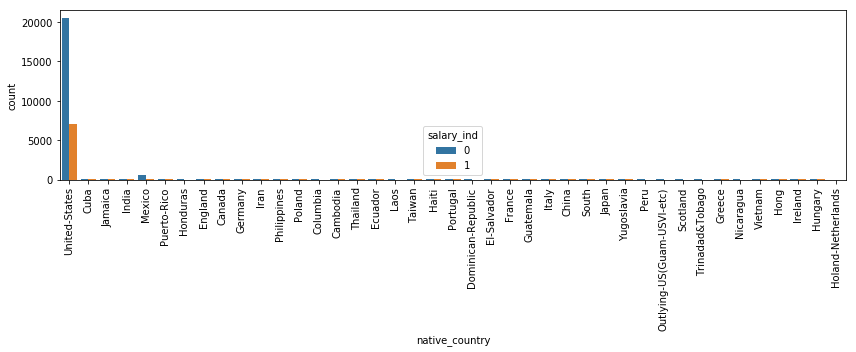

In [11]:
cntplt('native_country',adult,'salary_ind')

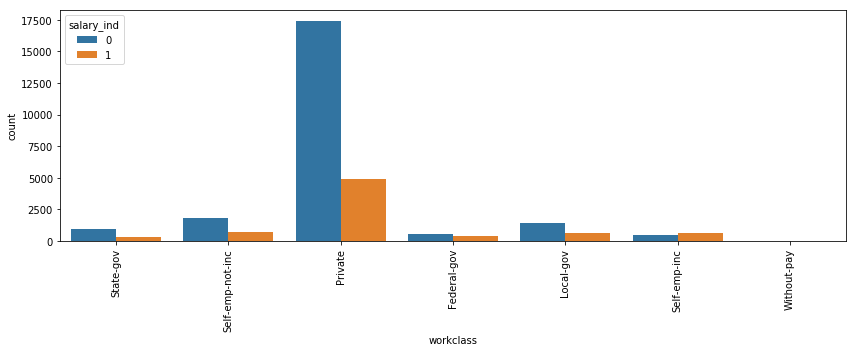

In [12]:
cntplt('workclass',adult,'salary_ind')

Removing the without pay category

In [13]:
adult_new = adult[adult.workclass != 'Without-pay']

In [14]:
adult_US=adult_new[adult_new['native_country']=='United-States']
print(adult_US.shape)
adult_other=adult_new[adult_new['native_country']!='United-States']
print(adult_other.shape)

(27491, 23)
(2657, 23)


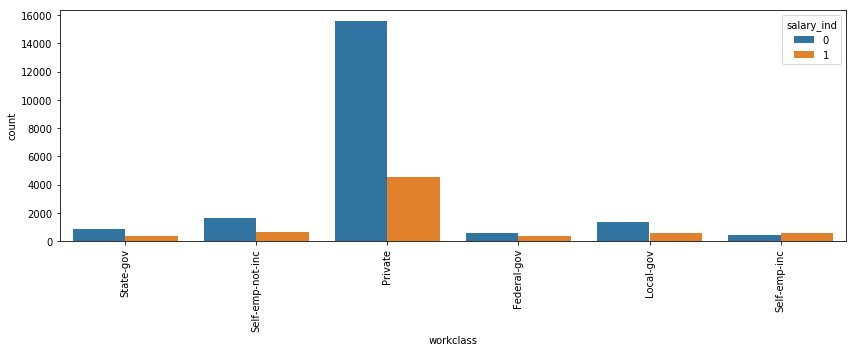

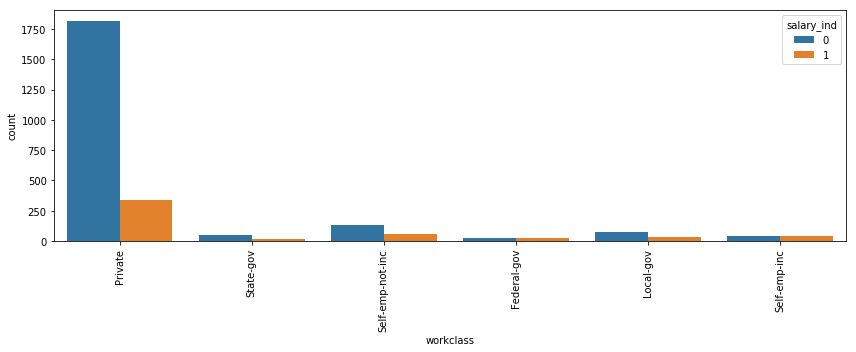

In [15]:
cntplt('workclass',adult_US,'salary_ind')
cntplt('workclass',adult_other,'salary_ind')

Inference: without pay and never worked doesn't or very minimal salaries. so they can be ignored for process 
    lets remove the without pay category all together they arent important

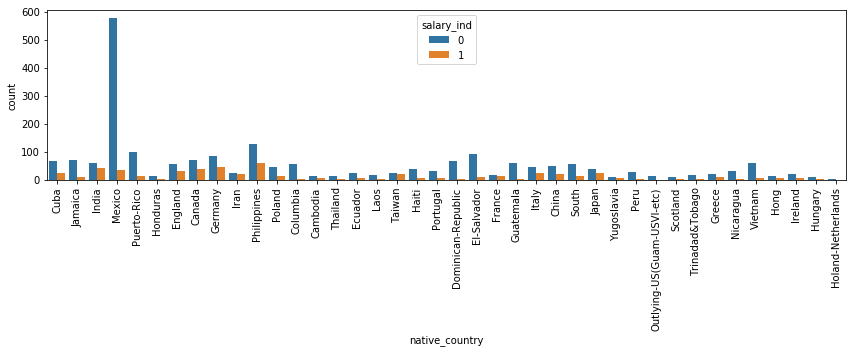

In [16]:
cntplt('native_country',adult_other,'salary_ind')

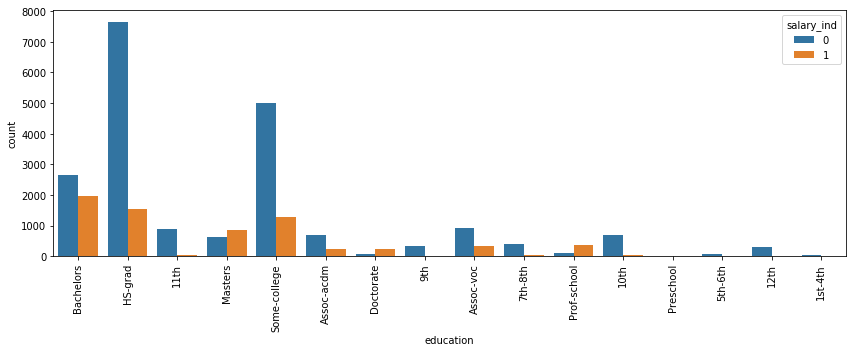

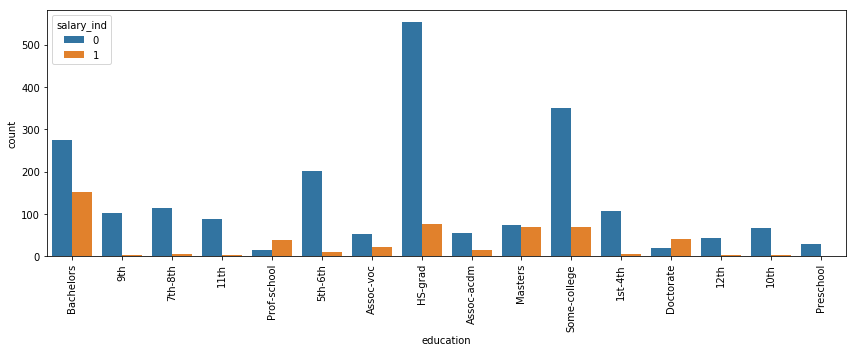

In [17]:
cntplt('education',adult_US,'salary_ind')
cntplt('education',adult_other,'salary_ind')

Inference: HS-Grad forms the major share, but bachelors, some-college also include good amount of populace, rest are small numbers

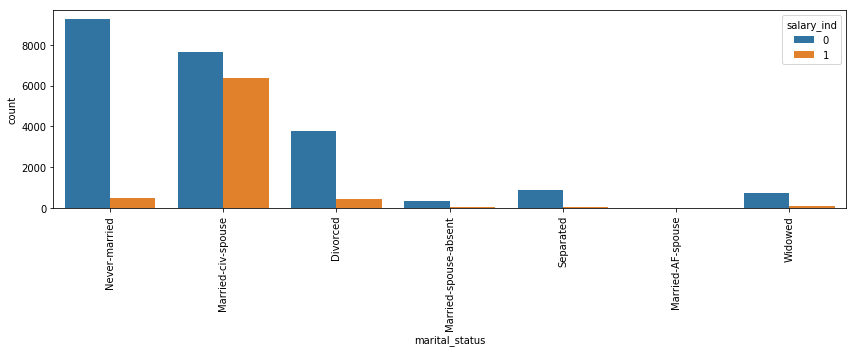

In [18]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x="marital_status", data=adult_new,hue='salary_ind')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Let's change the categorical columns into numbers and see

In [19]:
adult_new.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary', 'workclass_ind', 'education_ind', 'marital_status_ind',
       'occupation_ind', 'relationship_ind', 'race_ind', 'native_country_ind',
       'salary_ind'],
      dtype='object')

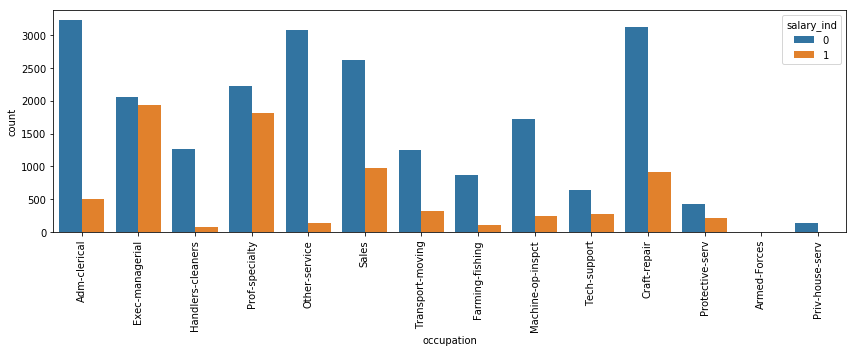

In [20]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x="occupation", data=adult_new,hue='salary_ind')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

armed forces have less number of records/no higher salaries

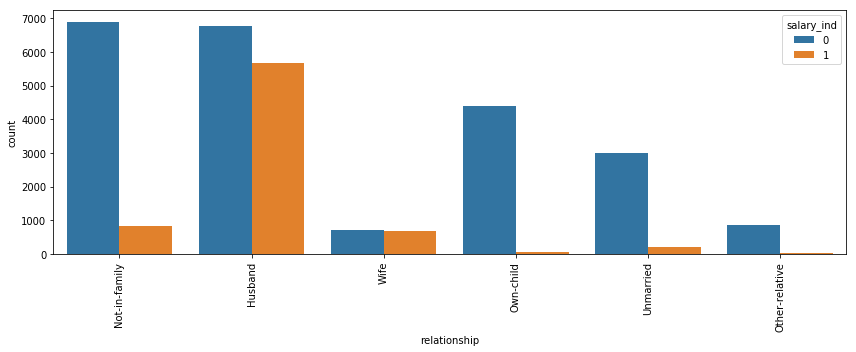

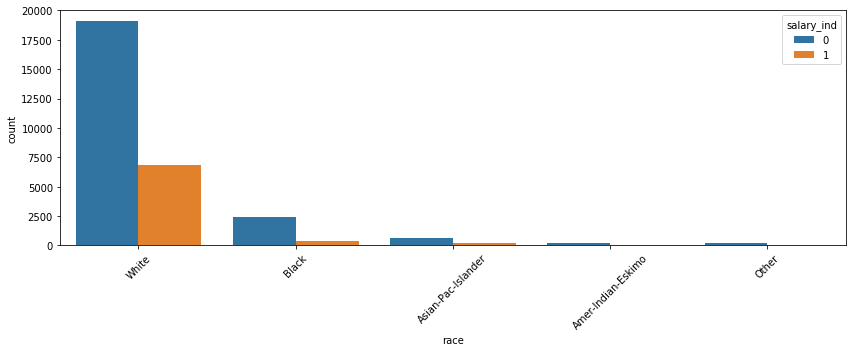

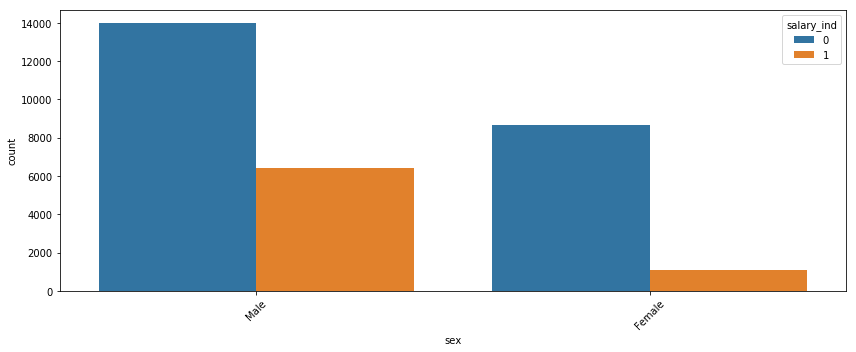

In [21]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x="relationship", data=adult_new,hue='salary_ind')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x="race", data=adult_new,hue='salary_ind')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x="sex", data=adult_new,hue='salary_ind')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



US has to be treated separately and rest all the countries have to be treated separately

Let's eliminate the non-numeric columns and create a new dataset to be used 

In [22]:
adult_new.dtypes

age                    int64
workclass             object
fnlwgt                 int64
education             object
education_num          int64
marital_status        object
occupation            object
relationship          object
race                  object
sex                   object
capital_gain           int64
capital_loss           int64
hours_per_week         int64
native_country        object
salary                object
workclass_ind           int8
education_ind           int8
marital_status_ind      int8
occupation_ind          int8
relationship_ind        int8
race_ind                int8
native_country_ind      int8
salary_ind              int8
dtype: object

filter only int datatypes using the below code

In [23]:
adult_num=adult_new.select_dtypes(include=['int8','int64'])

create a heat map with the variables keeping the target variable as salary_ind

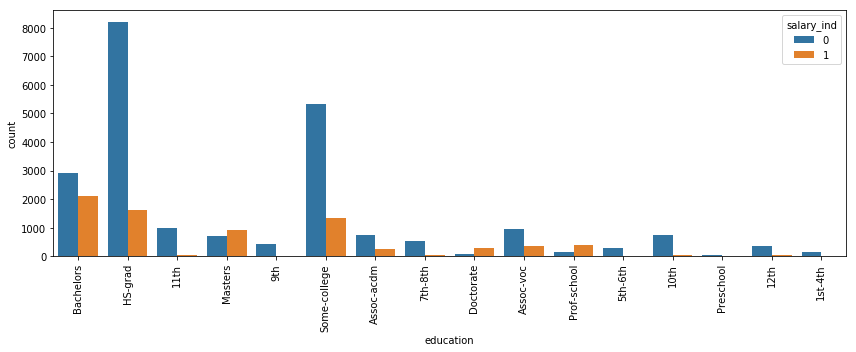

In [24]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x="education", data=adult_new,hue='salary_ind')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

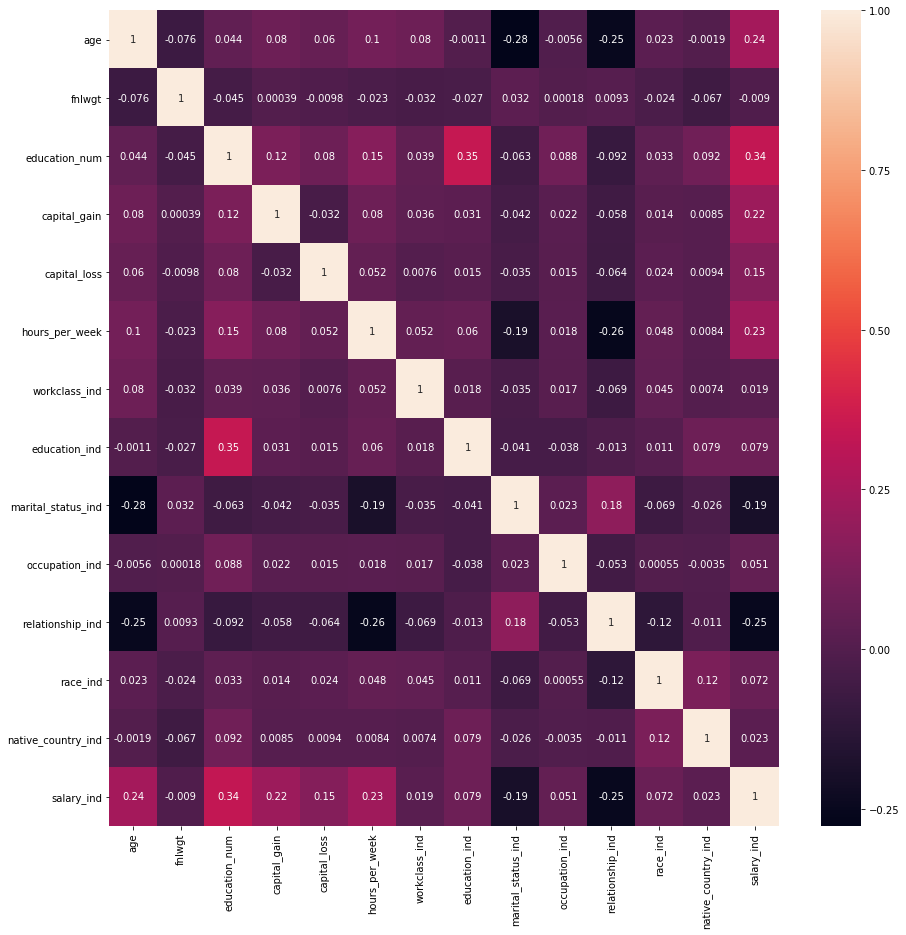

In [25]:
corr = adult_num.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True)
plt.show()

we need to remove duplicates before processing further

In [26]:
adult_num.count()

age                   30148
fnlwgt                30148
education_num         30148
capital_gain          30148
capital_loss          30148
hours_per_week        30148
workclass_ind         30148
education_ind         30148
marital_status_ind    30148
occupation_ind        30148
relationship_ind      30148
race_ind              30148
native_country_ind    30148
salary_ind            30148
dtype: int64

In [27]:
adult_num_dup=adult_num.drop_duplicates()

In [28]:
adult_num_dup.count()

age                   30125
fnlwgt                30125
education_num         30125
capital_gain          30125
capital_loss          30125
hours_per_week        30125
workclass_ind         30125
education_ind         30125
marital_status_ind    30125
occupation_ind        30125
relationship_ind      30125
race_ind              30125
native_country_ind    30125
salary_ind            30125
dtype: int64

In [29]:
after duplicates are removed, we can start removing unnecessary data from dataset as well

SyntaxError: invalid syntax (<ipython-input-29-342ac72fc0c3>, line 1)